Image search engine

In [1]:
from google.colab import files

uploaded = files.upload()

Saving archive (9).zip to archive (9).zip


In [2]:
from zipfile import ZipFile
file_name = "/content/archive (9).zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print("Completed")

Completed


In [24]:
import os
import numpy as np
from numpy.linalg import norm
from tqdm import tqdm
import os
import PIL
import time
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
import math
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.decomposition import PCA

In [25]:
img_size =224

model = ResNet50(weights='imagenet', include_top=False,input_shape=(img_size, img_size, 3),pooling='max')

In [26]:
batch_size = 64
root_dir = '/content/hymenoptera_data'

img_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

datagen = img_gen.flow_from_directory(root_dir,
                                        target_size=(img_size, img_size),
                                        batch_size=batch_size,
                                        class_mode=None,
                                        shuffle=False)

num_images = len(datagen.filenames)
num_epochs = int(math.ceil(num_images / batch_size))

feature_list = model.predict_generator(datagen, num_epochs,verbose = 1)

Found 397 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  from ipykernel import kernelapp as app


7/7 [==============================] - 41s 6s/step


In [27]:
print("Num images   = ", len(datagen.classes))
print("Shape of feature_list = ", feature_list.shape)

Num images   =  397
Shape of feature_list =  (397, 2048)


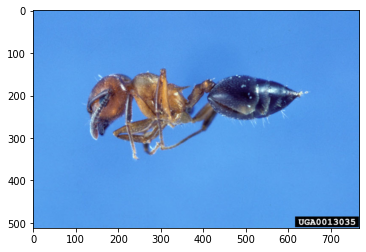

In [28]:
plt.imshow(plt.imread('/content/hymenoptera_data/train/ants/0013035.jpg'))
plt.show()

In [29]:
neighbors = NearestNeighbors(n_neighbors=5,
                             algorithm='ball_tree',
                             metric='euclidean')
neighbors.fit(feature_list)

NearestNeighbors(algorithm='ball_tree', metric='euclidean')

In [30]:
filenames = [root_dir + '/' + s for s in datagen.filenames]

In [31]:
neighbors = NearestNeighbors(n_neighbors=5,
                             algorithm='ball_tree',
                             metric='euclidean')
neighbors.fit(feature_list)

NearestNeighbors(algorithm='ball_tree', metric='euclidean')

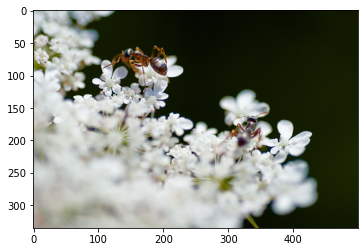

In [32]:
plt.imshow(plt.imread('/content/hymenoptera_data/train/ants/1099452230_d1949d3250.jpg'))
plt.show()

In [33]:
img_path = '/content/hymenoptera_data/train/bees/1092977343_cb42b38d62.jpg'
input_shape = (img_size, img_size, 3)
img = image.load_img(img_path, target_size=(input_shape[0], input_shape[1]))
img_array = image.img_to_array(img)
expanded_img_array = np.expand_dims(img_array, axis=0)
preprocessed_img = preprocess_input(expanded_img_array)

In [34]:
test_img_features = model.predict(preprocessed_img, batch_size=1)

_, indices = neighbors.kneighbors(test_img_features)

(1, 5)
                .............Input image to search.................


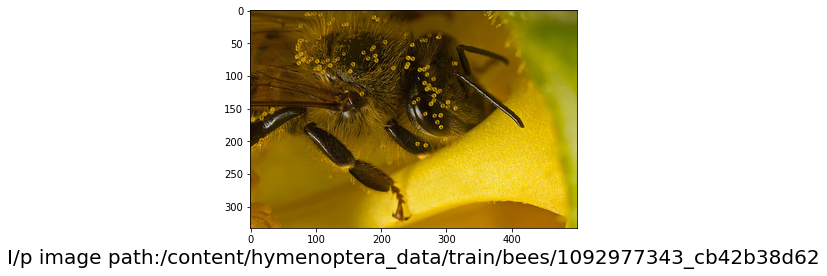



                  --------*Found image after searching from database*-------


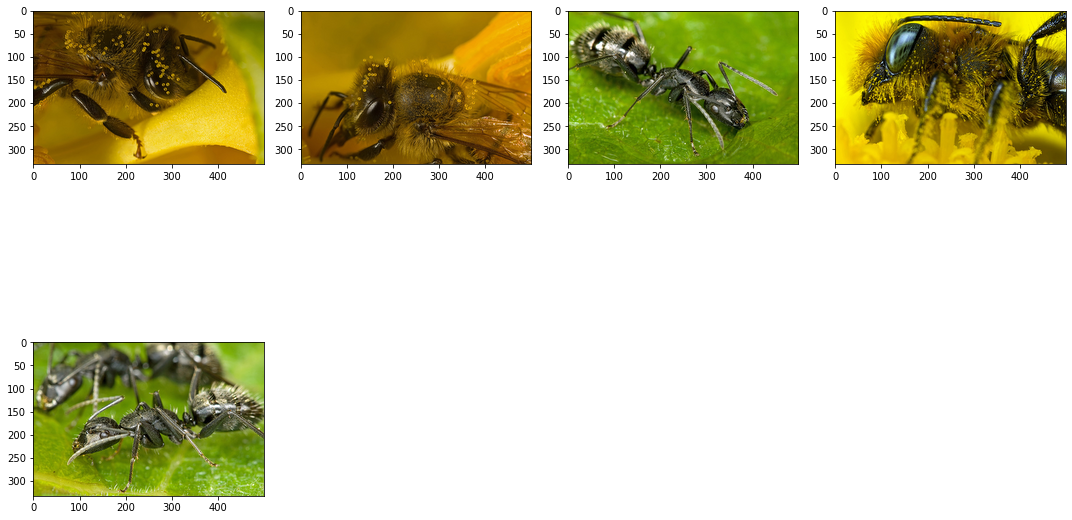

In [41]:
def similar_images(indices):
    plt.figure(figsize=(15,10), facecolor='white')
    plotnumber = 1    
    for index in indices:
        if plotnumber<=len(indices) :
            ax = plt.subplot(2,4,plotnumber)
            plt.imshow(mpimg.imread(filenames[index]), interpolation='lanczos')            
            plotnumber+=1
    plt.tight_layout()

print(indices.shape)
print("                .............Input image to search.................")
plt.imshow(mpimg.imread(img_path), interpolation='lanczos')
plt.xlabel('I/p image path:' + img_path.split('.')[0] ,fontsize=20)
plt.show()
print()
print()
print('                  --------*Found image after searching from database*-------')
similar_images(indices[0])

In [18]:
model.save("imgsearch_model.h5")

In [19]:
import tensorflow.keras as tf
mymodel = tf.models.load_model("imgsearch_model.h5")

In [ ]:
#Web based application (just run this single block belowto get the o/p)

Give the path of the i/p image /content/hymenoptera_data/train/bees/1232245714_f862fbe385.jpg
(1, 5)
     .............Input image to search.................


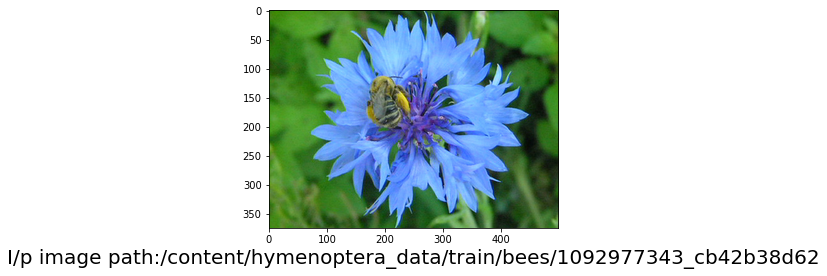



                  --------*Found image after searching from database*-------


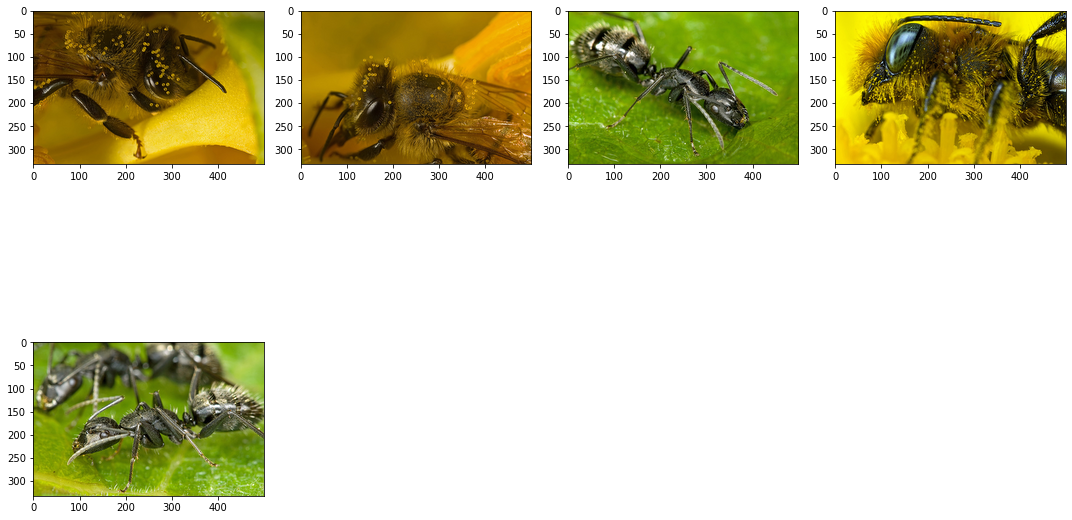

In [39]:
qimg=str(input('Give the path of the i/p image '))
input_shape = (img_size, img_size, 3)
img = image.load_img(img_path, target_size=(input_shape[0], input_shape[1]))
img_array = image.img_to_array(img)
expanded_img_array = np.expand_dims(img_array, axis=0)
preprocessed_img = preprocess_input(expanded_img_array)

test_img_features = mymodel.predict(preprocessed_img, batch_size=1)

_, indices = neighbors.kneighbors(test_img_features)

def similar_images(indices):
    plt.figure(figsize=(15,10), facecolor='white')
    plotnumber = 1    
    for index in indices:
        if plotnumber<=len(indices) :
            ax = plt.subplot(2,4,plotnumber)
            plt.imshow(mpimg.imread(filenames[index]), interpolation='lanczos')            
            plotnumber+=1
    plt.tight_layout()

print(indices.shape)
print("                .............Input image to search.................")
plt.imshow(mpimg.imread(qimg), interpolation='lanczos')
plt.xlabel('I/p image path:' + img_path.split('.')[0],fontsize=20)
plt.show()
print()
print()
print('                  --------*Found image after searching from database*-------')
similar_images(indices[0])